# 로지스틱 회귀
: 선형 방정식을 이용해서 회귀란 단어가 있지만, 실제적으로 분류(Classification)에 대한 확률을 계산하는 모델

In [47]:
# 데이터 시각화
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [48]:
import pandas as pd

In [49]:
fish = pd.read_csv('../data/fishes.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [50]:
# Target으로 사용할 Species의 종류 알아보기
fish.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### Feature와 Target Data 정리하기

In [51]:
# Feature Data
fish_input = fish.drop('Species',axis=1).to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [52]:
fish_input.shape

(159, 5)

In [53]:
# Target Data
fish_target = fish.Species.to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

### Train Test 분리

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [56]:
train_input.shape

(119, 5)

In [57]:
train_target.shape

(119,)

In [58]:
train_input[:5]

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [500.    ,  45.    ,  48.    ,   6.96  ,   4.896 ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [110.    ,  22.    ,  23.5   ,   5.5225,   3.995 ],
       [140.    ,  20.7   ,  23.2   ,   8.5376,   3.2944]])

> 각 컬럼별 크기 차이가 많이 난다. 표준화가 필요하다

### 표준화 시키기

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [61]:
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [62]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

---
### KNN을 이용한 확률 예측

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
kn = KNeighborsClassifier(n_neighbors=3).fit(train_scaled, train_target)
print('train score :', kn.score(train_scaled, train_target))
print('test score :', kn.score(test_scaled, test_target))

train score : 0.8907563025210085
test score : 0.85


In [65]:
# kn의 분류정보 보기
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [66]:
# test data로 예측해보기
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [67]:
# test data의 확률 예측값 보기
import numpy as np

In [68]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4) # 소수점 이하 4자리로 정리

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

> 3열은 Pike, 4열은 Perch 의 형태, 숫자 값은 확률

In [69]:
# test data 3번째의 이웃들을 알아보기
distance, indexes = kn.kneighbors(test_scaled[3:4]) # numpy는 3:4 로 해야 3 하나 나옴
indexes

array([[104, 115, 106]])

In [70]:
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

> KNN은 이웃의 수를 정하는 모델이다.   
> 현재 이웃의 수를 3으로 했기 때문에, 확률로 나오는 경우의 수는 3가지(1/3, 2/3, 3/3)이다.

---
# 로지스틱 회귀를 이용한 확률 예측
- 데이터의 각 컬럼을 새로운 변수로 사용하는 다중회귀를 이용
- 회귀식을 사용해서 로지스틱 회귀라고 하지만 실질적으론 확률을 예측하는 모델
- 선형회귀식에서 출발했고, 딥러닝 모델의 기반이다.

기본적으로 위의 데이터를 보면   
$'z = a * 무게 + b * 길이 + c * 대각선 + d * 높이 + e * 두께 + f'$로 되어있다.   
위의 z 식을 이용해 나오는 결과값은 '음의 무한 ~ 양의 무한'의 범위로 출력된다.   
이를 해결하는 방법이 $'Sigmoid 함수'$   
Sigmoid 함수는 결과값이 0~1 사이의 수이므로 0.5를 기준으로 양성클래스(1), 음성클래스(0)으로 분류한다.   
로지스틱 회귀를 사용할 경우에는 이 Sigmoid 함수를 로지스틱 함수라고 표현한다.

In [71]:
z = np.arange(-5, 5, 0.1)
z[:5]

array([-5. , -4.9, -4.8, -4.7, -4.6])

In [72]:
y = np.full((100,1), 0.5) # 100행 1열로 0.5를 채운다.
y[:5]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

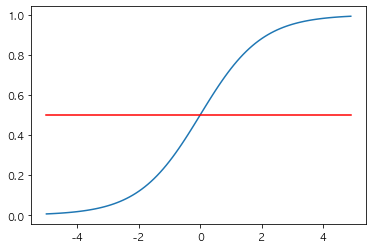

In [73]:
phi = 1 / (1 + np.exp(-z)) # 자연상수 e의 -z 제곱

plt.plot(z, phi)
plt.plot(z,y,c='red')

plt.show()

> 0.5를 기준으로 위는 양성클래스, 아래는 음성클래스   
> 실질저으로 x의 값이 0 초과면 양성클래스, 아니면 음성클래스로 분류하며    
이를 이용하는 것이 predict 함수이고 각각의 확률수치를 알아보는 것이 predict_proba 함수이다.

---
### 로지스틱 회귀로 이진분류 수행하기

In [74]:
# 2종류의 데이터만 발췌하기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [75]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [77]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [78]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [79]:
# 확률값으로 보기
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

> 각 행의 열을 합치면 1이 된다.

In [80]:
# 회귀식의 기울기(가중치)
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [81]:
# 다중식으로 계산
decision = lr.decision_function(train_bream_smelt[:5])
decision

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [82]:
# Sigmoid 함수에 대입하여 확률값을 구성하기
from scipy.special import expit

In [83]:
print(expit(decision))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


> predict_proba 값의 2열에 해당하는 값들이다.   
그래서 Sigmoid 함수를 Activation 함수라고도 한다.

---
### 로지스틱 회귀로 다중 분류 수행하기

In [84]:
lr = LogisticRegression(C=20, max_iter=100).fit(train_scaled, train_target)
# C : ridge 규제 값이며 기본은 1이다. 적을수록 강한 규제
# max_iter : iteration, 최대 반복 수. 모델의 정확성을 유지하기 위해 반복작업을 시행한다. 기본값은 100
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [85]:
# Test data로 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [86]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.566, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.09 , 0.002, 0.001]])

In [87]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [88]:
# 사용된 다중 공식
print(lr.coef_, lr.intercept_)

[[-1.4905421  -1.03388688  2.5981309   7.7010905  -1.19898821]
 [ 0.19743003 -2.00430042 -3.78377532  6.50494946 -1.99725866]
 [ 3.56169555  6.34534789 -8.49297599 -5.75593302  3.79378676]
 [-0.10575561  3.60083391  3.93006894 -3.61334796 -1.75124966]
 [-1.39815543 -6.07665211  5.2587158  -0.87346372  1.86121086]
 [-1.38756983  1.49434369  1.39400626 -5.67679984 -4.40003784]
 [ 0.6228974  -2.32568608 -0.90417059  1.71350459  3.69253675]] [-0.09382676 -0.2634882   3.24915811 -0.14626884  2.65333107 -6.78287518
  1.38396979]


> 다중회귀인 경우에 각 샘플별로 회귀식을 구성하여 계산한다.   
이진분류처럼 클래스 하나를 계산하여 나머지 클래스넌 1에서 뺀 확률로는 구할 수 없어서   
각 컬럼과 Target을 일일이 계산해야 한다.

In [93]:
# 확률 분포 검증
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.48   2.35   2.43  -3.87]
 [ -0.68   0.45   2.65  -1.18   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.81  -0.11   3.5   -0.11  -0.71]]


> 계산할 항목이 여러개이므로 이를 Sigmoid 함수에 사용하면 각자의 값이 생성되어, 확률의 합이 1이 넘는 경우가 발생한다.    
다중 항목인 경우에는 softmax를 사용한다.

### SoftMax 함수

In [90]:
from scipy.special import softmax

In [94]:
proba = softmax(decision, axis=1)
print(np.round(proba, 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.566 0.    0.076]
 [0.    0.    0.904 0.002 0.09  0.002 0.001]]
